<a href="https://colab.research.google.com/github/Amaliastf/PCVK_Ganjil_2023/blob/main/week_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pertemuan 3**

Nama : Amalia Salsa Lutfiana

Nim : 2141720228

Absen/Kelas : 04/2141720228


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


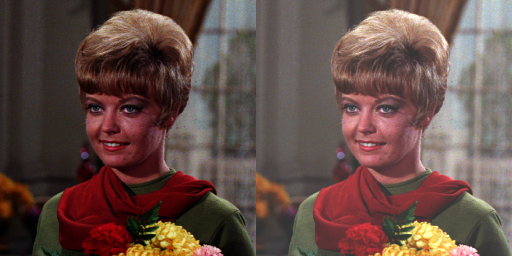

In [4]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Implementasi Inverse Citra Menggunakan Formula 


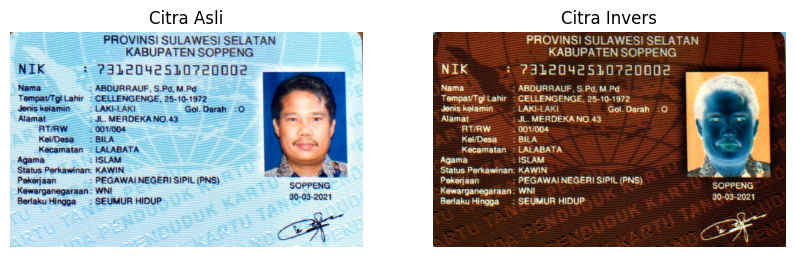

In [59]:
print(' Implementasi Inverse Citra Menggunakan Formula ')

image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
image = cv.imread(image_path)

# Melakukan perhitngan pada invers citra
inverted_image = 255 - image

# Citra asli dan invers
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Invers')
plt.imshow(cv.cvtColor(inverted_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Implementasi Transformasi Contrast
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


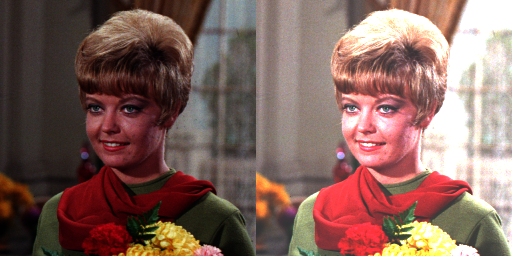

In [73]:
print('Implementasi Transformasi Contrast')

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

if -255 <= brightness <= 255 and 1.0 <= contrast <= 3.0:
    original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
    brightness_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(
                    original[y, x, c] * contrast + brightness, 0, 255
                )

    # Cara sederhana tanpa perulangan
    # brightness_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)
else:
    print('Masukkan tingkat kecerahan dalam rentang [-255 - 255] dan kontras dalam rentang [1.0 - 3.0].')

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


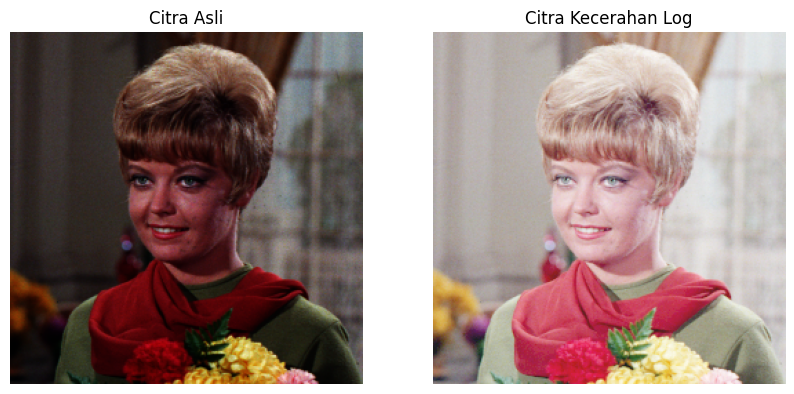

In [15]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

# Tingkat Kecerahan
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image_path = ('/content/drive/MyDrive/PCVK/Images/female.tiff')
image = cv.imread(image_path)

# Menghitung transformasi kecerahan logaritmik
log_brightness_image = c * np.log(1 + image.astype(float))

# Normalisasi ke dalam rentang 0-255
log_brightness_image = (log_brightness_image / np.max(log_brightness_image) * 255).astype(np.uint8)

# Menampilkan citra asli dan citra dengan transformasi kecerahan logaritmik
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Kecerahan Log')
plt.imshow(cv.cvtColor(log_brightness_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

A. Averaging


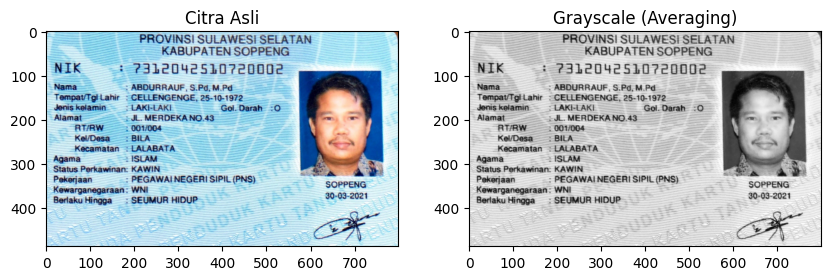

In [41]:
#4A
image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
image = cv.imread(image_path)

print('A. Averaging')
# Konversi citra ke grayscale menggunakan metode averaging
gray_image = np.mean(image, axis=2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Grayscale (Averaging)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

B. Lightness


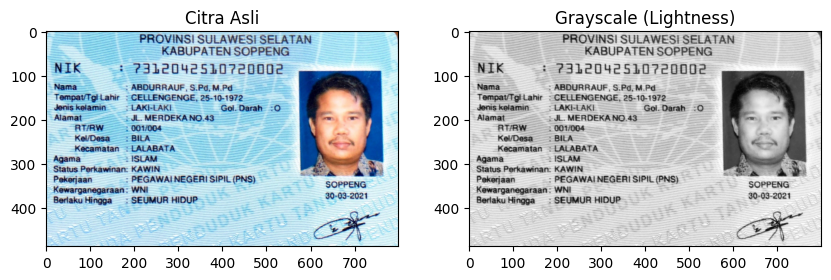

In [42]:
#4B
# Membaca citra
image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
image = cv.imread(image_path)

print('B. Lightness')
# Konversi citra ke grayscale menggunakan metode lightness
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2Luv)[:, :, 0]

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Grayscale (Lightness)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

C. Luminance


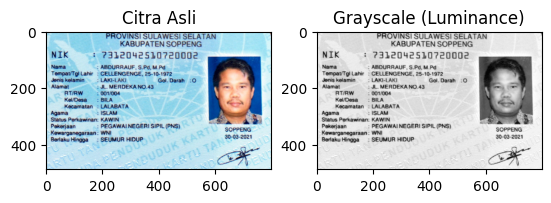

In [72]:
#4C
# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

print('C. Luminance')

# Menghitung citra Grayscale dengan metode Lightness
img_original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
Lightness = np.zeros(original.shape, original.dtype)

#ekstrasi 3 channel warna
R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * R)

# cv2_imshow(Averaging)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_original)
ax[0].set_title('Citra Asli')
ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Grayscale (Luminance)')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

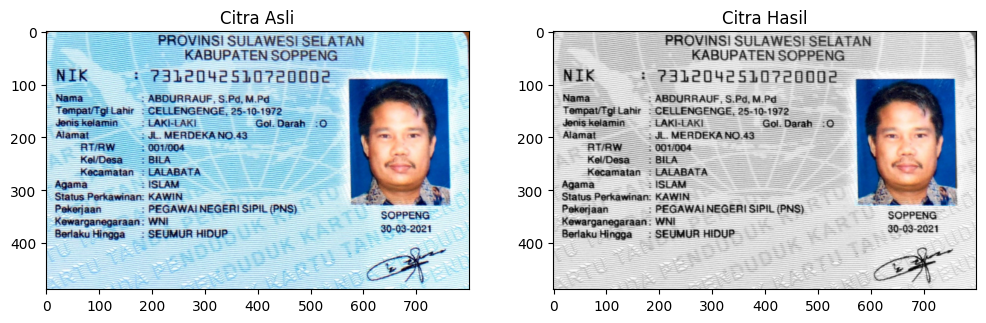

In [71]:
# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Tentukan titik koordinat
x1, y1 = 570, 90
x2, y2 = 760, 330

# Menggunakan Formula Luminance
grayscale_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        pixel_value = original[y, x]

        # Cek apakah piksel berada dalam area yang ingin dipertahankan
        if x1 <= x <= x2 and y1 <= y <= y2:
            grayscale_image[y, x] = pixel_value
        else:
            grayscale_value = 0.21 * pixel_value[2] + 0.72 * pixel_value[1] + 0.07 * pixel_value[0]
            grayscale_image[y, x] = [grayscale_value, grayscale_value, grayscale_value]

# Menampilkan citra asli dan Menampilkan Citra
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Citra Hasil')
plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB))

plt.show()